# Proyek Analisis Data: Bike Sharing
- **Nama:** Chatarina Evangelista Sitorus
- **Email:** chatarinaevas304@gmail.com
- **ID Dicoding:** dicodingchatzz

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan jumlah penyewaan sepeda pada hari kerja dan akhir pekan?
- Bagaimana perbedaan jumlah penyewaan sepeda berdasarkan musim?
- Bagaimana pola penyewaan sepeda antara pengguna kasual dan pengguna terdaftar berdasarkan hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [118]:
day_df = pd.read_csv("data/day.csv")
day_df.head()
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

print("Kolom pada day.csv:", day_df.columns)
print("Kolom pada hour.csv:", hour_df.columns)
print("Jumlah baris day.csv:", len(day_df))
print("Jumlah baris hour.csv:", len(hour_df))

#readme = open("data/Readme.txt", "r").read()



Kolom pada day.csv: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Kolom pada hour.csv: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Jumlah baris day.csv: 731
Jumlah baris hour.csv: 17379


**Insight:**
- Struktur Dataset: 
Dataset Bike Sharing terdiri dari dua file, yaitu day.csv dan hour.csv. day.csv memiliki 731 baris, yang merepresentasikan data penyewaan sepeda harian, sedangkan hour.csv memiliki 17.379 baris, yang mencatat penyewaan sepeda dalam skala jam.
- Kesamaan dan Perbedaan Kolom:
Kedua dataset memiliki kolom yang hampir sama, seperti season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt. Namun, hour.csv memiliki tambahan kolom hr (jam), yang tidak ada di day.csv, karena mencatat data per jam.
- Jumlah Data:
Jumlah data pada day.csv sesuai dengan jumlah hari dalam dua tahun (365 hari di tahun pertama dan 366 hari di tahun kedua), sementara hour.csv memiliki jumlah baris yang lebih besar karena mencatat data per jam selama periode yang sama.
- Kesesuaian Data:
Kedua dataset dapat digunakan secara terpisah atau digabungkan untuk analisis yang lebih mendalam. day.csv cocok untuk analisis tren harian, sedangkan hour.csv memberikan detail lebih rinci mengenai pola penyewaan berdasarkan jam.

### Assessing Data

In [ ]:
# Menilai data day_df
print("\n=== INFO DATA DAY ===")
day_df.info()
print("\nJumlah Missing Values:")
print(day_df.isna().sum())
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
display(day_df.describe())

# Cek kategori `weathersit`
print("Kategori weathersit yang ada:", day_df['weathersit'].unique())
print(day_df['weathersit'].value_counts())

# Menilai data hour_df
print("\n=== INFO DATA HOUR ===")
hour_df.info()
print("\nJumlah Missing Values:\n", hour_df.isna().sum())
print("Jumlah Duplikasi:", hour_df.duplicated().sum())
display(hour_df.describe())

print("Distribusi kategori `weathersit` di hour_df:")
print(hour_df['weathersit'].value_counts())
print("Distribusi kategori `weathersit` di day_df:")
print(day_df['weathersit'].value_counts())

print("\nRingkasan statistik untuk hum dan windspeed di hour_df:")
print(hour_df[['hum', 'windspeed']].describe())
print("\nJumlah nilai 0 dalam hum:", (hour_df['hum'] == 0).sum())
print("Jumlah nilai 0 dalam windspeed:", (hour_df['windspeed'] == 0).sum())





=== INFO DATA DAY ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: 

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Kategori weathersit yang ada: [2, 1, 3]
Categories (4, int64): [1, 2, 3, 4]
weathersit
1    463
2    247
3     21
4      0
Name: count, dtype: int64

=== INFO DATA HOUR ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64      

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Distribusi kategori `weathersit` di hour_df:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64
Distribusi kategori `weathersit` di day_df:
weathersit
1    463
2    247
3     21
4      0
Name: count, dtype: int64

Ringkasan statistik untuk hum dan windspeed di hour_df:
                hum     windspeed
count  17379.000000  17379.000000
mean       0.627229      0.190098
std        0.192930      0.122340
min        0.000000      0.000000
25%        0.480000      0.104500
50%        0.630000      0.194000
75%        0.780000      0.253700
max        1.000000      0.850700

Jumlah nilai 0 dalam hum: 22
Jumlah nilai 0 dalam windspeed: 2180


**Insight:**
- Pada day_df dan hour_df terdapat kesalahan tipe data untuk kolom dteday yaitu object yang seharusnya datetime.
- Pada day_df terdapat kesalahan tipe data untuk kolom season, yr, mnth, weekday, weathersit yaitu object yang seharusnya category.
- Pada hour_df terdapat kesalahan tipe data untuk kolom season, yr, mnth,  holiday, workingday, weekday, weathersit yaitu object yang seharusnya category.
- Kolom weathersit di day_df memiliki nilai maksimum 3, padahal di hour_df terdapat kategori 4.
- Ditemukan hum = 0 sebanyak 22 kali di hour_df, yang tidak masuk akal dan perlu diperbaiki dengan menggantinya ke rata-rata.
- Ditemukan windspeed = 0 sebanyak 2180 kali di hour_df, yang terlalu banyak dan kemungkinan besar merupakan error pencatatan, sehingga perlu diperbaiki dengan menggantinya ke rata-rata.

### Cleaning Data

In [ ]:
#Membersihkan data day_df
print("\n=== CLEANING DATA day_df ===")
# 1. Mengubah kolom 'dteday' menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# 2. Ubah kolom kategori menjadi tipe category
categorical_cols_day = ['season', 'yr', 'mnth', 'weekday', 'weathersit']
for col in categorical_cols_day:
    day_df[col] = day_df[col].astype('category')

# 3. Tambahkan kategori 4 pada 'weathersit' agar konsisten dengan hour_df
if 4 not in day_df['weathersit'].cat.categories:
    day_df['weathersit'] = day_df['weathersit'].cat.add_categories([4])

# 4. Cek apakah ada hari di hour_df dengan weathersit = 4 tetapi tidak ada di day_df
days_with_weathersit_4 = hour_df[hour_df['weathersit'] == 4]['dteday'].unique()

# 5. Hapus data duplikasi (jika ada)
day_df.drop_duplicates(inplace=True)

# 6. Tampilkan informasi setelah pembersihan
print("\n=== INFO DATA day_df SETELAH CLEANING ===")
print(day_df.info())

# 7. Cek distribusi weathersit setelah cleaning
print("\nDistribusi weathersit di day_df setelah cleaning:")
print(day_df['weathersit'].value_counts())

# 8. Cek jumlah duplikasi setelah pembersihan
print("\nJumlah duplikasi di day_df setelah cleaning:", day_df.duplicated().sum())

#Membersihkan data hour_df
print("\n=== CLEANING DATA hour_df ===")

# 1. Mengubah kolom 'dteday' menjadi tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# 2. Ubah kolom kategori menjadi tipe category
categorical_cols_hour = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']
for col in categorical_cols_hour:
    hour_df[col] = hour_df[col].astype('category')

# 3. Perbaiki nilai `hum = 0` dengan rata-rata
print("\nJumlah baris dengan hum = 0 sebelum perbaikan:", (hour_df['hum'] == 0).sum())
hour_df['hum'].replace(0, hour_df['hum'].mean(), inplace=True)
print("Jumlah baris dengan hum = 0 setelah perbaikan:", (hour_df['hum'] == 0).sum())

# 4. Perbaiki nilai `windspeed = 0` jika jumlahnya signifikan
print("\nJumlah baris dengan windspeed = 0 sebelum perbaikan:", (hour_df['windspeed'] == 0).sum())
if (hour_df['windspeed'] == 0).sum() > 100:  
    hour_df['windspeed'].replace(0, hour_df['windspeed'].mean(), inplace=True)
print("Jumlah baris dengan windspeed = 0 setelah perbaikan:", (hour_df['windspeed'] == 0).sum())

# 5. Hapus duplikasi jika ada
hour_df.drop_duplicates(inplace=True)

# 6. Tampilkan informasi setelah pembersihan
print("\n=== INFO DATA hour_df SETELAH CLEANING ===")
print(hour_df.info())

# 7. Cek distribusi weathersit setelah cleaning
print("\nDistribusi weathersit di hour_df setelah cleaning:")
print(hour_df['weathersit'].value_counts())

# 8. Cek jumlah duplikasi setelah pembersihan
print("\nJumlah duplikasi di hour_df setelah cleaning:", hour_df.duplicated().sum())


=== CLEANING DATA day_df ===

=== INFO DATA day_df SETELAH CLEANING ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  c

C:\Users\chata\AppData\Local\Temp\ipykernel_4424\2484607815.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df['hum'].replace(0, hour_df['hum'].mean(), inplace=True)


**Insight:**
- Tipe data sudah diperbaiki (kolom dteday menjadi 'datetime', dan kolom-kolom kategori menjadi 'category').
- Kategori weathersit = 4 ditambahkan di day_df untuk konsistensi, tetapi nilainya tidak diubah.
- hum = 0 (22 kali) dan windspeed = 0 (2180 kali) di hour_df diperbaiki dengan rata-rata.
- Tidak ada duplikasi di day_df maupun hour_df.

## Exploratory Data Analysis (EDA)

### Explore Data day_df dan hour_df

In [93]:
#=== Eksplorasi Data day_df ===
day_df.describe(include="all")

# Jumlah penyewaan berdasarkan musim
day_df.groupby("season").agg({
    "cnt": ["sum", "mean", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)

# Jumlah penyewaan pada hari kerja vs akhir pekan
day_df.groupby("workingday").agg({
    "cnt": ["sum", "mean", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)

# Pola penyewaan antara pengguna kasual dan terdaftar
day_df.agg({
    "casual": ["sum", "mean", "max", "min"],
    "registered": ["sum", "mean", "max", "min"]
})

# Jumlah penyewaan berdasarkan kondisi cuaca
day_df.groupby("weathersit").agg({
    "cnt": ["sum", "mean", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)


#=== Eksplorasi Data hour_df ===
hour_df.describe(include="all")

# Jumlah penyewaan berdasarkan jam
hour_df.groupby("hr").agg({
    "cnt": ["sum", "mean", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)

# Jumlah penyewaan berdasarkan hari dalam seminggu
hour_df.groupby("weekday").agg({
    "cnt": ["sum", "mean", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)

# Jumlah penyewaan berdasarkan kondisi cuaca
hour_df.groupby("weathersit").agg({
    "cnt": ["sum", "mean", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)


C:\Users\chata\AppData\Local\Temp\ipykernel_4424\3881334278.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("season").agg({
C:\Users\chata\AppData\Local\Temp\ipykernel_4424\3881334278.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("weathersit").agg({
C:\Users\chata\AppData\Local\Temp\ipykernel_4424\3881334278.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("wee

cnt                     
                sum        mean  max min
weathersit                              
1           2338173  204.869272  977   1
2            795952  175.165493  957   1
3            158331  111.579281  891   1
4               223   74.333333  164  23

**Insight:**

DAY_DF
- Musim gugur (season = 3) memiliki jumlah penyewaan sepeda terbanyak dibandingkan musim lainnya, dengan total 1.061.129 penyewaan dan rata-rata 5.644 per hari. Sebaliknya, musim dingin (season = 1) memiliki penyewaan terendah, kemungkinan karena cuaca yang lebih dingin mengurangi aktivitas bersepeda.
- Jumlah penyewaan sepeda lebih tinggi pada hari kerja (workingday = 1) dengan total 2.292.410 penyewaan dibandingkan akhir pekan atau hari libur (workingday = 0) yang hanya 1.000.269 penyewaan. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi harian dibandingkan rekreasi akhir pekan.
- Jumlah penyewaan dari pengguna terdaftar (registered) jauh lebih tinggi dibandingkan pengguna kasual (casual), dengan total 2.672.662 vs 620.017 penyewaan. Hal ini menunjukkan bahwa mayoritas penyewa sepeda adalah pelanggan tetap yang memiliki akun terdaftar, sedangkan pengguna kasual lebih sedikit dan kemungkinan besar hanya menggunakan sepeda sesekali.
- Jumlah penyewaan sepeda tertinggi terjadi pada kondisi cuaca cerah (kategori 1) dengan total 2.257.952 penyewaan, diikuti oleh cuaca berawan (kategori 2) dengan 996.858 penyewaan. Penyewaan sepeda menurun drastis saat cuaca buruk (kategori 3: hujan ringan/salju ringan), dengan hanya 37.869 penyewaan.

HOUR_DF
- Penyewaan sepeda paling tinggi terjadi pada pukul 17:00 (5 sore) dan 18:00 (6 sore), yang kemungkinan besar bertepatan dengan jam pulang kerja. Selain itu, pukul 8 pagi juga memiliki jumlah penyewaan yang tinggi, mencerminkan penggunaan sepeda untuk perjalanan ke tempat kerja atau sekolah. Sebaliknya, penyewaan sepeda sangat rendah antara pukul 00:00 - 05:00, saat aktivitas masyarakat cenderung minim.
- Penyewaan sepeda tertinggi terjadi pada hari Jumat (weekday = 5), diikuti oleh Kamis (weekday = 4) dan Sabtu (weekday = 6), menunjukkan bahwa penggunaan sepeda meningkat menjelang akhir pekan. Penyewaan terendah terjadi pada Minggu (weekday = 0), kemungkinan karena lebih sedikit orang yang bepergian untuk bekerja atau sekolah.
- Penyewaan sepeda tertinggi terjadi saat cuaca cerah (weathersit = 1) dengan total 2.338.173 penyewaan, diikuti oleh cuaca berawan (weathersit = 2) dengan 795.952 penyewaan. Penyewaan berkurang signifikan saat hujan ringan (weathersit = 3) dan hampir tidak ada saat cuaca ekstrem (weathersit = 4), menunjukkan bahwa kondisi cuaca sangat mempengaruhi penggunaan sepeda.




In [ ]:
day_df = pd.read_csv("data/day.csv")
day_df.head()
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

print("Kolom pada day.csv:", day_df.columns)
print("Kolom pada hour.csv:", hour_df.columns)
print("Jumlah baris day.csv:", len(day_df))
print("Jumlah baris hour.csv:", len(hour_df))

#readme = open("data/Readme.txt", "r").read()



Kolom pada day.csv: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Kolom pada hour.csv: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Jumlah baris day.csv: 731
Jumlah baris hour.csv: 17379


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada perbedaan jumlah penyewaan sepeda pada hari kerja dan akhir pekan?

C:\Users\chata\AppData\Local\Temp\ipykernel_4424\240557335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


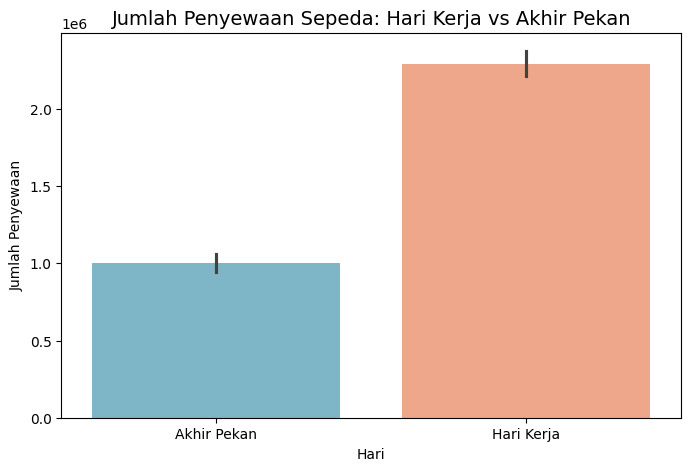

In [94]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=day_df['workingday'], 
    y=day_df['cnt'], 
    estimator=sum, 
    palette=["#72BCD4", "#FFA07A"],
)
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan", "Hari Kerja"])
plt.title("Jumlah Penyewaan Sepeda: Hari Kerja vs Akhir Pekan", fontsize=14)
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.show()

### Pertanyaan 2: Bagaimana perbedaan jumlah penyewaan sepeda berdasarkan musim?

C:\Users\chata\AppData\Local\Temp\ipykernel_4424\1564001647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


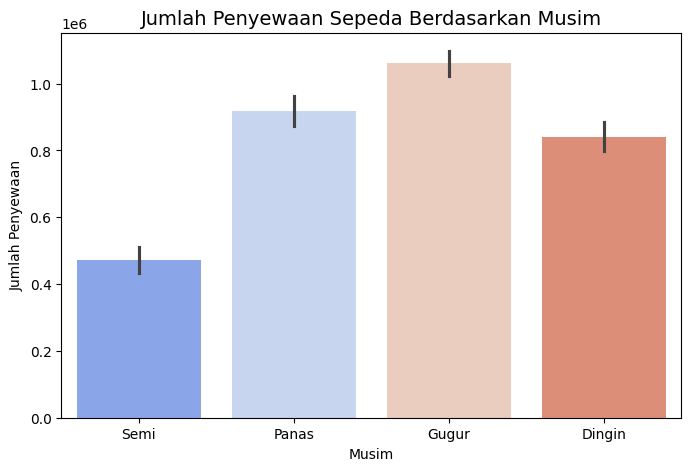

In [105]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=day_df['season'], 
    y=day_df['cnt'], 
    estimator=sum, 
    palette="coolwarm"
)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Semi", "Panas", "Gugur", "Dingin"])
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

### Pertanyaan 3: Bagaimana pola penyewaan sepeda antara pengguna kasual dan pengguna terdaftar berdasarkan hari kerja dan akhir pekan?

<Figure size 800x500 with 0 Axes>

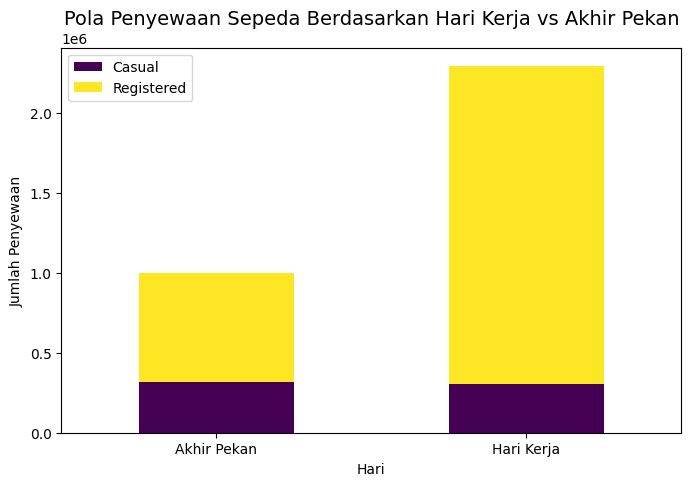

In [ ]:
# Kelompokkan data berdasarkan hari kerja vs akhir pekan
day_df_grouped_workingday = day_df.groupby("workingday")[["casual", "registered"]].sum().reset_index()

# Ganti angka workingday dengan label yang lebih jelas
day_df_grouped_workingday["workingday"] = day_df_grouped_workingday["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})

# Plot stacked bar chart berdasarkan hari kerja vs akhir pekan
plt.figure(figsize=(8, 5))
day_df_grouped_workingday.set_index("workingday").plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))
plt.title("Pola Penyewaan Sepeda Berdasarkan Hari Kerja vs Akhir Pekan", fontsize=14)
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.legend(["Casual", "Registered"])
plt.xticks(rotation=0)  
plt.show()


**Insight:**
- Jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan bahwa sepeda lebih sering digunakan sebagai sarana transportasi utama daripada sekadar untuk rekreasi.
- Penyewaan tertinggi terjadi di musim gugur dan musim panas, sementara musim semi memiliki jumlah penyewaan terendah, kemungkinan karena cuaca yang lebih mendukung aktivitas luar ruangan di musim panas dan gugur.
- Pengguna terdaftar mendominasi baik di hari kerja maupun akhir pekan, namun pada akhir pekan, persentase pengguna kasual meningkat, menandakan bahwa sepeda lebih banyak digunakan untuk rekreasi saat libur.

## Analisis Lanjutan (Opsional)

C:\Users\chata\AppData\Local\Temp\ipykernel_4424\821969914.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = day_df.groupby("season")["cnt"].mean().sort_values()
C:\Users\chata\AppData\Local\Temp\ipykernel_4424\821969914.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demand_distribution.index, y=demand_distribution.values, palette="coolwarm")



=== Distribusi Kategori Demand ===
demand_category
Medium Demand    379
High Demand      180
Low Demand       172
Name: count, dtype: int64

=== Distribusi Kategori Musim ===
season_category
High Season      372
Low Season       181
Medium Season    178
Name: count, dtype: int64

=== Distribusi Demand Berdasarkan Musim ===
demand_category  High Demand  Low Demand  Medium Demand
season_category                                        
High Season              140          29            203
Low Season                 5         117             59
Medium Season             35          26            117


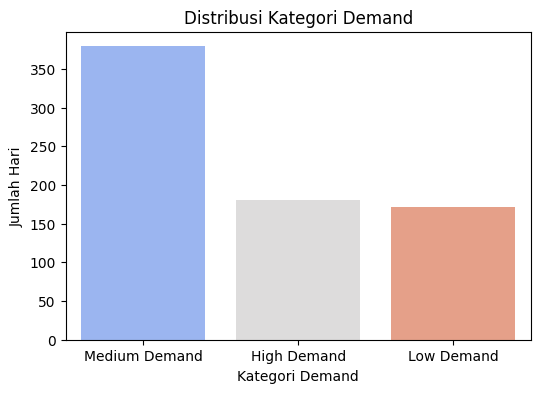

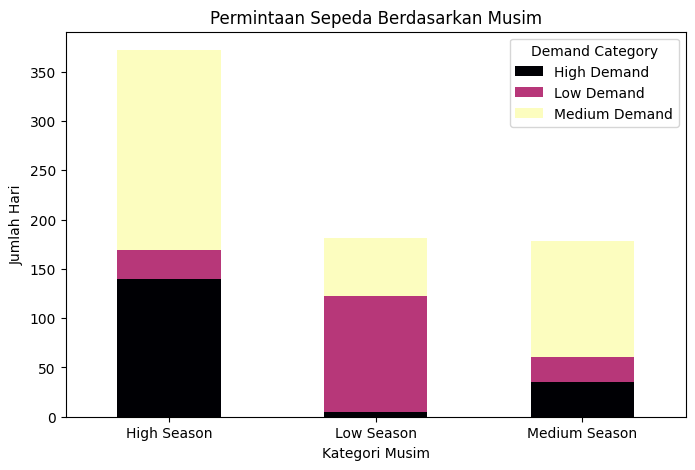

In [111]:
# === CLUSTERING JUMLAH PENYEWAAN HARIAN ===
def categorize_demand(cnt):
    if cnt <= 3000:
        return "Low Demand"
    elif cnt <= 6000:
        return "Medium Demand"
    else:
        return "High Demand"

# Tambahkan kategori demand
day_df["demand_category"] = day_df["cnt"].apply(categorize_demand)

# === Clustering Musim Berdasarkan Rata-rata Penyewaan ===
season_avg = day_df.groupby("season")["cnt"].mean().sort_values()

low_season = season_avg.index[0]
medium_season = season_avg.index[1]
high_season = season_avg.index[2]

def categorize_season(season):
    if season == low_season:
        return "Low Season"
    elif season == medium_season:
        return "Medium Season"
    else:
        return "High Season"

# Tambahkan kategori musim
day_df["season_category"] = day_df["season"].apply(categorize_season)

# === Analisis Distribusi Clustering ===
# Distribusi kategori demand
demand_distribution = day_df["demand_category"].value_counts()

print("\n=== Distribusi Kategori Demand ===")
print(demand_distribution)

# Distribusi kategori musim
season_distribution = day_df["season_category"].value_counts()

print("\n=== Distribusi Kategori Musim ===")
print(season_distribution)

# === Analisis Hubungan Demand dengan Musim ===
season_demand = day_df.groupby("season_category")["demand_category"].value_counts().unstack()

print("\n=== Distribusi Demand Berdasarkan Musim ===")
print(season_demand)


# === Visualisasi Clustering ===

# 1. Visualisasi Distribusi Kategori Demand
plt.figure(figsize=(6, 4))
sns.barplot(x=demand_distribution.index, y=demand_distribution.values, palette="coolwarm")
plt.title("Distribusi Kategori Demand")
plt.xlabel("Kategori Demand")
plt.ylabel("Jumlah Hari")
plt.show()

# 2. Visualisasi Demand Berdasarkan Musim
season_demand.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="magma")
plt.title("Permintaan Sepeda Berdasarkan Musim")
plt.xlabel("Kategori Musim")
plt.ylabel("Jumlah Hari")
plt.xticks(rotation=0)
plt.legend(title="Demand Category")
plt.show()


## Conclusion

- Conclusion Pertanyaan 1 (Perbedaan Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan): 
Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini menunjukkan bahwa sebagian besar pengguna menggunakan sepeda untuk keperluan transportasi sehari-hari, seperti bekerja atau sekolah, dibandingkan untuk rekreasi.

- Conclusion Pertanyaan 2 (Perbedaan Penyewaan Sepeda Berdasarkan Musim): 
Penyewaan sepeda tertinggi terjadi pada musim gugur dan musim panas, sedangkan musim semi memiliki jumlah penyewaan paling sedikit. Kemungkinan besar, cuaca yang lebih nyaman di musim gugur dan panas mendukung aktivitas bersepeda, sementara musim semi mungkin memiliki kondisi cuaca yang kurang ideal.

- Conclusion Pertanyaan 3 (Pola Penyewaan Pengguna Kasual dan Terdaftar Berdasarkan Hari Kerja dan Akhir Pekan): 
Pengguna terdaftar mendominasi penyewaan sepeda pada hari kerja, sedangkan pada akhir pekan terdapat peningkatan proporsi pengguna kasual. Ini mengindikasikan bahwa pengguna terdaftar lebih banyak menggunakan sepeda sebagai alat transportasi rutin, sedangkan pengguna kasual cenderung memanfaatkan sepeda untuk aktivitas santai di akhir pekan.

## Conclusion Analisis Lanjutan (Clustering Manual)

1. Sebagian besar hari masuk dalam kategori *Medium Demand*, sementara *High Demand* dan *Low Demand* lebih sedikit. Hal ini menunjukkan bahwa jumlah penyewaan sepeda per hari umumnya berada di tingkat menengah, bukan terlalu rendah atau sangat tinggi.  

2. Musim dengan penyewaan tertinggi (*High Season*) berlangsung lebih lama dibandingkan *Low Season*. Ini menunjukkan bahwa sebagian besar waktu dalam setahun memiliki kondisi yang mendukung tingginya permintaan sepeda.  

3. Pada *High Season*, jumlah penyewaan sepeda lebih tinggi, dengan banyak hari masuk dalam kategori *Medium Demand* dan *High Demand*. Ini menandakan bahwa kondisi musim yang baik mendorong lebih banyak orang untuk bersepeda.  

4. *Low Season* didominasi oleh *Low Demand*, yang berarti pada musim ini jumlah penyewaan sepeda cenderung lebih rendah, kemungkinan karena cuaca atau faktor lain yang kurang mendukung aktivitas bersepeda.  

5. Musim memiliki pengaruh besar terhadap jumlah penyewaan sepeda. Untuk meningkatkan penyewaan pada *Low Season*, dapat diterapkan strategi seperti promosi, diskon, atau peningkatan fasilitas agar lebih banyak orang tetap menggunakan sepeda.

## Data Merging & Export

Proses penggabungan (merging) dataset dilakukan untuk menyatukan informasi dari day_df (data harian) dan hour_df (data per jam) agar analisis dan visualisasi lebih lengkap dan tidak duplikasi data. Penggabungan dilakukan berdasarkan dteday sebagai kunci utama karena kedua dataset memiliki kolom ini sebagai indikator tanggal.

Alasan Penggabungan Dataset:
- Jika analisis hanya berfokus pada data harian, penggunaan day_df sudah mencukupi.
- Jika diperlukan analisis lebih mendetail berdasarkan jam, maka hour_df lebih sesuai.
- Untuk mendapatkan wawasan yang lebih komprehensif, seperti tren harian yang dilengkapi dengan data per jam, menggabungkan kedua dataset menjadi langkah yang tepat.

Tahapan yang Dilakukan:
- Menggabungkan data dari hour_df dengan day_df, dengan menghapus beberapa kolom yang sudah ada di hour_df agar tidak terjadi duplikasi.
- Menggunakan dteday sebagai kunci penggabungan karena kedua dataset berbagi kolom ini.
- Menyimpan hasil merge ke dalam file CSV (dashboard/main_data.csv) agar bisa digunakan pada tahap berikutnya, termasuk pembuatan dashboard.

In [127]:
# Debug: Periksa kolom yang ada sebelum penghapusan
print("Kolom di day_df sebelum drop:", day_df.columns.tolist())
print("Kolom di hour_df sebelum drop:", hour_df.columns.tolist())

# === Hapus Kolom yang Tidak Diperlukan ===
# Gunakan errors="ignore" agar tidak error jika kolom tidak ada
day_df.drop(columns=["instant", "casual", "registered", "cnt"], inplace=True, errors="ignore")
hour_df.drop(columns=["instant"], inplace=True, errors="ignore")

# Debug: Periksa kembali kolom setelah penghapusan
print("Kolom di day_df setelah drop:", day_df.columns.tolist())
print("Kolom di hour_df setelah drop:", hour_df.columns.tolist())

# === Merge Data (Gabungkan day_df & hour_df) ===
final_merged_df = pd.merge(
    hour_df,  
    day_df,  
    on="dteday",
    how="left"
)

# Debug: Cek kolom setelah merge
print("Kolom setelah merge:", final_merged_df.columns.tolist())

# === Hapus Kolom yang Redundan (Duplikat) ===
# Hapus semua kolom dengan akhiran "_y"
columns_to_drop = [col for col in final_merged_df.columns if col.endswith("_y")]
final_merged_df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

# Rename kolom "_x" agar lebih bersih
final_merged_df.rename(columns=lambda x: x.replace("_x", ""), inplace=True)

# Debug: Periksa kembali kolom setelah pembersihan
print("Kolom setelah final cleaning:", final_merged_df.columns.tolist())

# === Ekspor Data ke CSV ===
final_merged_df.to_csv("dashboard/main_data.csv", index=False)

print("✅ Data berhasil digabung dan diekspor ke 'dashboard/main_data.csv'")

Kolom di day_df sebelum drop: ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
Kolom di hour_df sebelum drop: ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Kolom di day_df setelah drop: ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
Kolom di hour_df setelah drop: ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Kolom setelah merge: ['dteday', 'season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x', 'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x', 'hum_x', 'windspeed_x', 'casual', 'registered', 'cnt', 'season_y', 'yr_y', 'mnth_y', 'holiday_y', 'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_

**Insight:**
Penggabungan dataset memastikan bahwa data memiliki cakupan yang lebih luas, mencakup informasi harian dan jam dalam satu dataset yang lebih ringkas. Hal ini memudahkan proses analisis lebih lanjut, seperti eksplorasi tren harian dan faktor-faktor yang mempengaruhi penyewaan sepeda. Selain itu, ekspor data ke main_data.csv memungkinkan penggunaan dataset yang telah bersih dan terstruktur dalam pembuatan dashboard tanpa perlu melakukan merging ulang.

## Cek Data Setelah Merging & Export

In [128]:
import pandas as pd

# Load dataset hasil ekspor
df = pd.read_csv("dashboard/main_data.csv")

# Tampilkan 5 baris pertama
print("🔍 5 Baris Pertama dari main_data.csv")
print(df.head())

# Cek informasi dataset (kolom, tipe data, jumlah non-null, dll.)
print("\n🔍 Informasi Dataset:")
print(df.info())

# Cek apakah ada duplikasi kolom atau data
print("\n🔍 Cek duplikasi baris:")
print(df.duplicated().sum(), "duplikasi ditemukan.")


🔍 5 Baris Pertama dari main_data.csv
       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  
0  0.24  0.2879  0.81        0.0       3          13   16  
1  0.22  0.2727  0.80        0.0       8          32   40  
2  0.22  0.2727  0.80        0.0       5          27   32  
3  0.24  0.2879  0.75        0.0       3          10   13  
4  0.24  0.2879  0.75        0.0       0           1    1  

🔍 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tota

**Insight:**
Dataset main_data.csv terdiri dari 17.379 entri dengan 16 kolom, tanpa adanya duplikasi baris. Semua kolom memiliki jumlah nilai non-null yang lengkap, sehingga dataset siap untuk diproses dalam pembuatan dashboard. 

## Perbaikan Setelah Merging & Export

In [129]:
import pandas as pd

# Load dataset hasil ekspor
df = pd.read_csv("dashboard/main_data.csv")

# 🔹 Konversi kolom `dteday` ke datetime
df["dteday"] = pd.to_datetime(df["dteday"])

# 🔹 Konversi kolom `season` menjadi kategori
df["season"] = df["season"].astype("category")

# 🔹 (Opsional) Konversi kategori lain untuk optimasi penyimpanan
categorical_columns = ["yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

# Tampilkan info dataset setelah perbaikan
print("✅ Informasi Dataset Setelah Perbaikan:")
print(df.info())

# Simpan kembali file yang sudah diperbaiki
df.to_csv("dashboard/main_data.csv", index=False)

print("✅ Kolom `dteday` dikonversi ke datetime dan `season` ke kategori. File berhasil diperbarui!")


✅ Informasi Dataset Setelah Perbaikan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int